In [1]:
# load packages
import numpy as np
import pandas as pd
# import napari
import tifffile as tf
from skimage import io # import tiff file as ndarray
import os
import matplotlib.pyplot as plt

# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2



In [4]:
# choose based on run in acadia or home computer
# home_dir = "/mnt/labNAS/"
home_dir = "/Volumes/Data/"

metadata = pd.read_csv("stp_metadata.csv")

in_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/input_tifs/"
out_path = home_dir+"Emily/STP_for_MAPseq/4_python_output/output_figs/"

# add paths to metadata
# make sure to use data aligned to steg/mmus respectively
for i in range(metadata.shape[0]):
    if metadata.loc[i,"species"] == "STeg":
        b_path = in_path+"norm_subtracted/STeg_220429_aligned/"+metadata.loc[i,"brain"]+"_aligned_to_STeg_220429_norm_subtracted.tif"
    elif metadata.loc[i,"species"] == "MMus":
        b_path = in_path+"norm_subtracted/MMus_220303_aligned/"+metadata.loc[i,"brain"]+"_aligned_to_MMus_220303_norm_subtracted.tif"
    
    metadata.loc[i,"path"] = b_path

# area list from make_masks.py
areas = ["grey", "CTX", "OMCc", "ACAc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS"]


In [5]:
# load images
images = []
for i in range(metadata.shape[0]):
    images.append(tf.imread(metadata.loc[i,"path"]))

# # load atlases
# st_atlas_path = in_path+"Steg_220429_registered_atlas_RESIZED.tif"
# st_atlas = tf.imread(st_atlas_path)

# mm_atlas_path = in_path+"MMus_220303_registered_atlas_RESIZED.tif"
# mm_atlas = tf.imread(mm_atlas_path)


In [8]:
# # load masks
# steg_masks = []
# for i in range(len(areas)):
#     with open(in_path+"masks/STeg_220429_"+areas[i]+".npy", "rb") as f:
#             steg_masks.append(np.load(f))

# mmus_masks = []
# for i in range(len(areas)):
#     with open(in_path+"masks/MMu# load masks
# steg_masks = []
# for i in range(len(areas)):
#     with open(in_path+"masks/STeg_220429_"+areas[i]+".npy", "rb") as f:
#             steg_masks.append(np.load(f))

# mmus_masks = []
# for i in range(len(areas)):
#     with open(in_path+"masks/MMus_220303_"+areas[i]+".npy", "rb") as f:
#             mmus_masks.append(np.load(f))s_220303_"+areas[i]+".npy", "rb") as f:
#             mmus_masks.append(np.load(f))


In [9]:
# load masks for each individually aligned brain
from time import time
start = time()
# make dictionary where keys = areas, values=list of masks corresponding to metadata order
mask_dict = {}
for area in areas:
    area_masks = []
    print("working on", area)
    for i in range(metadata.shape[0]):
        print("\t", metadata.loc[i,"brain"])
        save_folder = in_path+"masks/"+metadata.loc[i,"brain"]+"_masks/"
        with open(save_folder+metadata.loc[i,"brain"]+"_"+area+".npy", "rb") as f:
            area_masks.append(np.load(f))
        
    mask_dict[area] = area_masks

# for area in mask_dict:
#     print(area, ": \t", len(mask_dict[area]))

end = time()
print("took", end-start, "seconds to load")

working on grey
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on CTX
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on OMCc
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on ACAc
	 ACC_MMus_230403_b1
	 ACC_MMus_230404_b2
	 ACC_STeg_230308_b1
	 ACC_STeg_230322_b2
	 ACC_STeg_230501_b3
	 OMC_MMus_220119_b0
	 OMC_MMus_220303_b1
	 OMC_MMus_220324_b2
	 OMC_STeg_220208_b0
	 OMC_STeg_220411_b1
	 OMC_STeg_220429_b2
working on au

# quantify integrated fluorescence




## OMC

In [10]:
# set areas that match w/ mapseq data
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]


In [17]:
omc_fluor = calc_fluor_individ(images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="OMC")
omc_fluor

,area,Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,758.94467,12611.92,OMC_MMus_220119_b0,MMus,OMC
1,CP,33308.48915,26214.38,OMC_MMus_220119_b0,MMus,OMC
2,aud,182.46147,5800.56,OMC_MMus_220119_b0,MMus,OMC
3,AMY,3599.00465,3626.00,OMC_MMus_220119_b0,MMus,OMC
4,TH,4919.38967,20142.54,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
61,SNr,460.61675,1134.04,OMC_STeg_220429_b2,STeg,OMC
62,SCm,1263.27789,6007.56,OMC_STeg_220429_b2,STeg,OMC
63,PG,160.60834,676.22,OMC_STeg_220429_b2,STeg,OMC
64,PAG,833.85142,4157.06,OMC_STeg_220429_b2,STeg,OMC


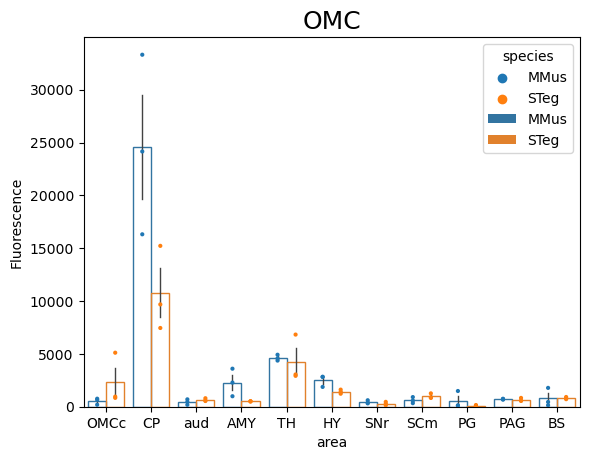

In [18]:
# make dot plot
dot_bar_plot(omc_fluor, title="OMC", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

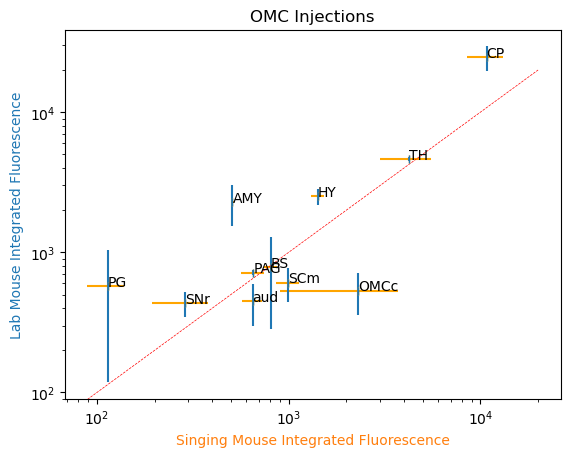

In [24]:
stvmm_area_scatter(omc_fluor, title="OMC Injections")
plt.show()

## ACC

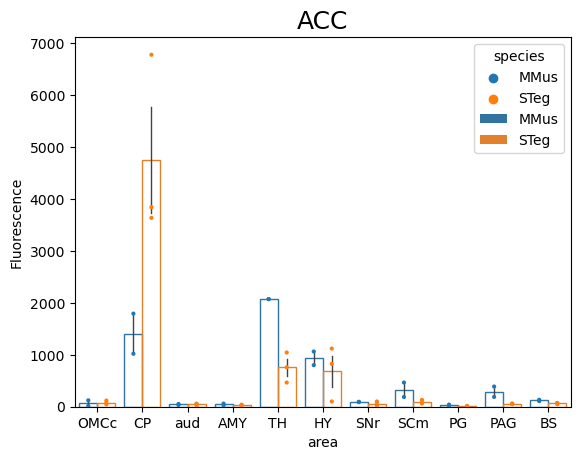

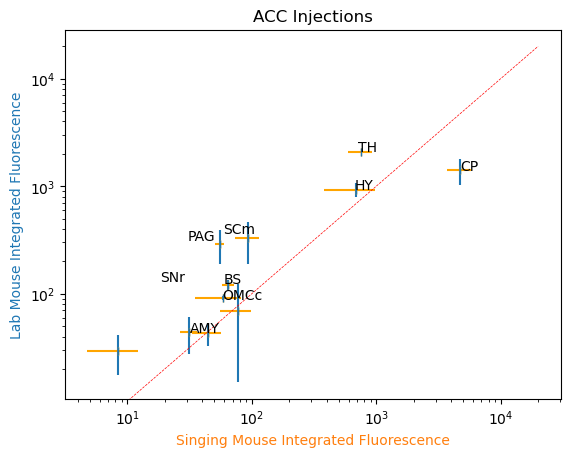

In [21]:
acc_fluor = calc_fluor_individ(images, metadata, mask_dict, areas_to_plot=areas_plot, inj_site="ACC")


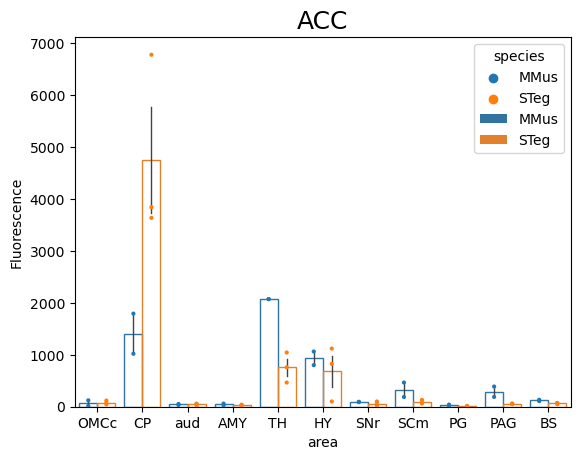

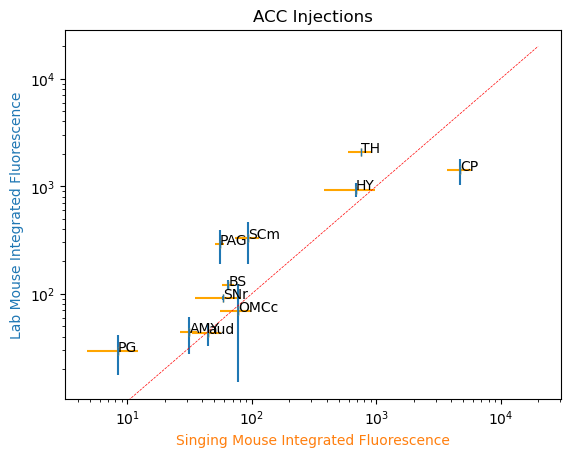

In [23]:
# make dot plot
dot_bar_plot(acc_fluor, title="ACC", xaxis="area", yaxis="Fluorescence", hueaxis="species")
plt.show()

# make scatterplot
stvmm_area_scatter(acc_fluor, title="ACC Injections")
plt.show()